In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from collections import  Counter
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
sns.set_theme(style="darkgrid")

# Veri Setinin Pandas DataFrame Olarak Okunması

In [ ]:
drive.mount("/content/gdrive")
test_df = pd.read_csv("/content/gdrive/MyDrive/teknofest_preprocessed_test_df.csv", sep=",")
train_df = pd.read_csv("/content/gdrive/MyDrive/teknofest_preprocessed_train_df.csv", sep=",")
val_df = pd.read_csv("/content/gdrive/MyDrive/teknofest_preprocessed_val_df.csv", sep=",")
raw_data = pd.read_csv("/content/gdrive/MyDrive/teknofest_raw_data.csv", sep="|")  

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
raw_data.head()

,id,text,is_offensive,target
0,81c11060-a240-4d54-841b-9e2916039e85,çürük dişli,1,INSULT
1,be80ebbf-b322-4c3b-afa1-94932ea80731,Bu adamın islama ve müslümanlara verdiği zarar...,1,RACIST
2,f99e2513-83ed-4076-ac72-b9e2cff3f049,erkekler zora gelmez,1,SEXIST
3,83ed2b2e-b815-4f36-9fc4-80a9050cf2d0,Utanmazın götüne kazık sokmuşlar bu tıkırtı ne...,1,PROFANITY
4,d93e05f7-bfdd-4cdb-99d8-3048761b30ff,otomasyon< sistemlerine= doğrudan bağlanabilir,0,OTHER


In [ ]:
df = pd.concat([test_df, train_df, val_df], axis=0, ignore_index=True)
df.head()

,id,text,is_offensive,target
0,ce129457-8bef-4c2c-89fc-56c2be682c17,anasını satayım böyle,1,SEXIST
1,279123c7-7592-4857-bfe0-fcb3b73d709e,sanığın haklarını korumak,0,OTHER
2,68899d1e-33d8-4392-a988-f68f3da07d19,kadınlar para harcar,1,SEXIST
3,5bc81173-5544-452b-a019-476a5f4f27b6,kadının tek işi evidir,1,SEXIST
4,c82e0cb1-fb3c-4e04-932c-895d6a2bfec7,kadının tek görevi erkeklerin ihtiyacını gider...,1,SEXIST


# Keşifsel Veri Analizi - Exploratory Data Analysis (EDA)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12461 entries, 0 to 12460
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            12461 non-null  object
 1   text          12461 non-null  object
 2   is_offensive  12461 non-null  int64 
 3   target        12461 non-null  object
dtypes: int64(1), object(3)
memory usage: 389.5+ KB


In [ ]:
df.target.unique()

array(['SEXIST', 'OTHER', 'INSULT', 'PROFANITY', 'RACIST'], dtype=object)

In [ ]:
# Target kolonundaki kategorik değişkenler bazı görselleştirmelerde kullanmak için numerik değerler ile değiştirildi
arr = []
for i in range(len(df)):
  if(df.iloc[i,3] == 'SEXIST'):
    arr.append(0)
  if(df.iloc[i,3] == 'OTHER'):
    arr.append(1)
  if(df.iloc[i,3] == 'INSULT'):
    arr.append(2)
  if(df.iloc[i,3] == 'PROFANITY'):
    arr.append(3)
  if(df.iloc[i,3] == 'RACIST'):
    arr.append(4)
df["target_numeric"] = arr

In [ ]:
df.head()

,id,text,is_offensive,target,target_numeric
0,ce129457-8bef-4c2c-89fc-56c2be682c17,anasını satayım böyle,1,SEXIST,0
1,279123c7-7592-4857-bfe0-fcb3b73d709e,sanığın haklarını korumak,0,OTHER,1
2,68899d1e-33d8-4392-a988-f68f3da07d19,kadınlar para harcar,1,SEXIST,0
3,5bc81173-5544-452b-a019-476a5f4f27b6,kadının tek işi evidir,1,SEXIST,0
4,c82e0cb1-fb3c-4e04-932c-895d6a2bfec7,kadının tek görevi erkeklerin ihtiyacını gider...,1,SEXIST,0


In [ ]:
df['target'].value_counts()
# Etiketlerin dağılımı arasında büyük bir fark olmadığı gözlemlendi.

OTHER        3578
INSULT       2393
PROFANITY    2376
SEXIST       2081
RACIST       2033
Name: target, dtype: int64

In [ ]:
df['target'].value_counts().values

array([3578, 2393, 2376, 2081, 2033])

# Etiketlerin Dağılımının Pie Chart ve Bar Chart İle Çizilerek İncelenmesi

([<matplotlib.patches.Wedge at 0x7ff1cfbc7c70>,
 [Text(-0.40644415150015256, 1.0221561288332235, 'OTHER'),
  Text(-1.0465414322046709, -0.33874921502343946, 'INSULT'),
  Text(-0.060934143430631214, -1.0983109897312215, 'PROFANITY'),
  Text(0.9639943401405586, -0.5298253600734579, 'SEXIST'),
  Text(0.9464918574452994, 0.5604936786349577, 'RACIST')],
 [Text(-0.2216968099091741, 0.5575397066363037, '28.71%'),
  Text(-0.5708407812025477, -0.18477229910369422, '19.20%'),
  Text(-0.03323680550761702, -0.5990787216715753, '19.07%'),
  Text(0.5258150946221228, -0.2889956509491588, '16.70%'),
  Text(0.5162682858792541, 0.3057238247099769, '16.31%')])

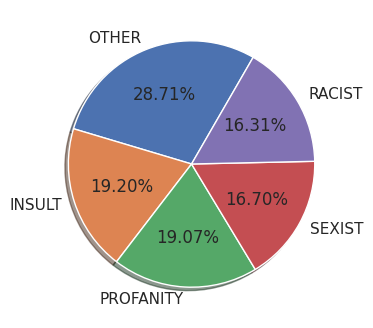

In [ ]:
plt.pie(x = df['target'].value_counts().values,
            labels=['OTHER', 'INSULT','PROFANITY','SEXIST','RACIST'],
            autopct='%1.2f%%',
            shadow=True,
            startangle=60)

<Axes: xlabel='target', ylabel='Count'>

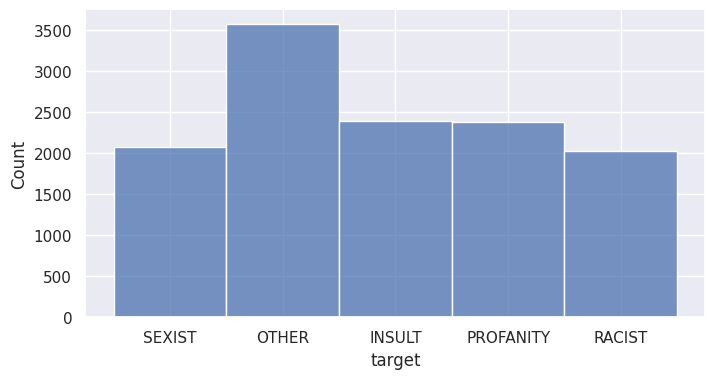

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x="target")

# Metin Uzunluklarının Karakter Bazında İncelenmesi

In [ ]:
df['text_length'] = df.text.apply(len)
df.head()

,id,text,is_offensive,target,target_numeric,text_length
0,ce129457-8bef-4c2c-89fc-56c2be682c17,anasını satayım böyle,1,SEXIST,0,21
1,279123c7-7592-4857-bfe0-fcb3b73d709e,sanığın haklarını korumak,0,OTHER,1,25
2,68899d1e-33d8-4392-a988-f68f3da07d19,kadınlar para harcar,1,SEXIST,0,20
3,5bc81173-5544-452b-a019-476a5f4f27b6,kadının tek işi evidir,1,SEXIST,0,22
4,c82e0cb1-fb3c-4e04-932c-895d6a2bfec7,kadının tek görevi erkeklerin ihtiyacını gider...,1,SEXIST,0,52


In [ ]:
df['text_length'].describe()
# Maksimum 275 karakter uzunluğunda veri bulunmaktadır.
# Ortalama metin karakter uzunluğu 40.4.

count    12461.000000
mean        40.406709
std         25.471431
min          5.000000
25%         24.000000
50%         33.000000
75%         49.000000
max        275.000000
Name: text_length, dtype: float64

## Ofansif ve Ofansif Olmayan Etiketler Arasındaki Karakter Uzunluğu Farkının İncelenmesi

Text(0.5, 0, 'Message Length')

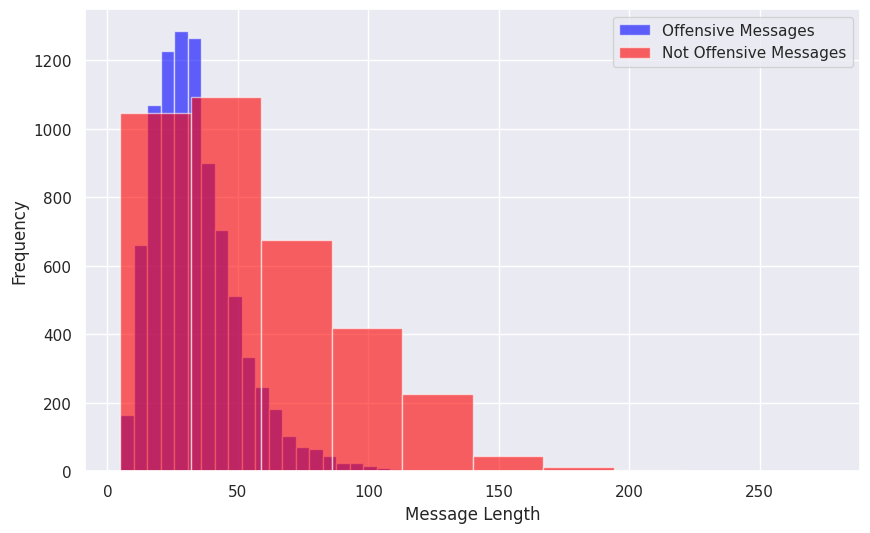

In [ ]:
plt.figure(figsize=(10, 6))

df[df.is_offensive == 1].text_length.plot(bins=35, kind='hist', color='blue', 
                                       label='Offensive Messages', alpha=0.6)
df[df.is_offensive == 0].text_length.plot(kind='hist', color='red', 
                                       label='Not Offensive Messages', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")

In [ ]:
df.groupby('target').describe()['text_length']

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
INSULT,2393.0,28.578771,13.954348,5.0,18.0,26.0,36.0,98.0
OTHER,3578.0,56.359978,34.190296,5.0,29.0,47.0,77.0,275.0
PROFANITY,2376.0,32.935185,15.974875,5.0,22.0,30.0,41.0,186.0
RACIST,2033.0,40.394491,21.070299,9.0,26.0,36.0,50.0,167.0
SEXIST,2081.0,35.121096,15.385550,6.0,25.0,32.0,42.0,148.0


# Metin Uzunluklarının Karakter Bazında İncelenmesi

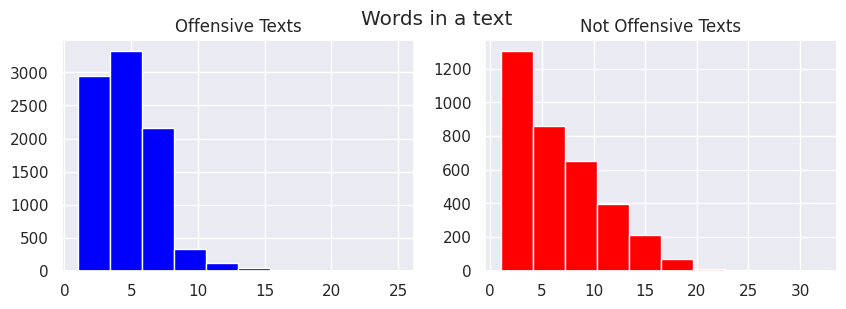

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,3))
text_len=df[df['is_offensive']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='blue')
ax1.set_title('Offensive Texts')
text_len=df[df['is_offensive']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='red')
ax2.set_title('Not Offensive Texts')
fig.suptitle('Words in a text')
plt.show()

In [ ]:
df["word_count"] = df['text'].str.split().map(lambda x: len(x))

In [ ]:
word_count_means = df.groupby('target').mean()

In [ ]:
word_count_means = round(word_count_means,2)

Text(0.5, 76.24999999999999, '')

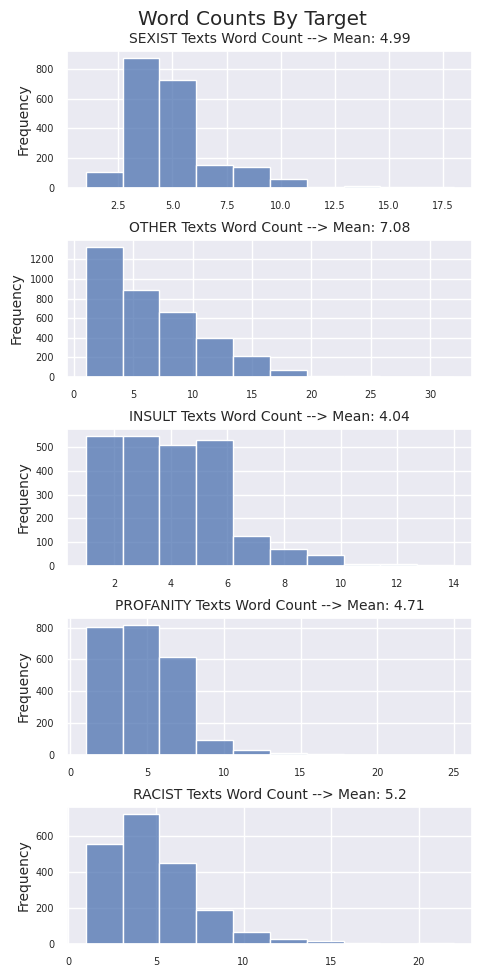

In [ ]:
fig, axes = plt.subplots(5, 1, figsize=(5, 10))
fig.suptitle('Word Counts By Target')
fig.tight_layout()
sns.set_style("darkgrid")

# SEXIST
sns.histplot(ax=axes[0], data=df[df['target'] == 'SEXIST'], x='word_count', bins=10)
axes[0].set_title(f"SEXIST Texts Word Count --> Mean: {word_count_means.loc['SEXIST'].word_count}", fontsize=10)
axes[0].tick_params(labelsize=7)
axes[0].set_ylabel('Frequency', fontsize=10)
axes[0].set_xlabel('')

# OTHER
sns.histplot(ax=axes[1], data=df[df['target'] == 'OTHER'], x='word_count', bins=10)
axes[1].set_title(f"OTHER Texts Word Count --> Mean: {word_count_means.loc['OTHER'].word_count}", fontsize=10)
axes[1].tick_params(labelsize=7)
axes[1].set_ylabel('Frequency', fontsize=10)
axes[1].set_xlabel('')

# INSULT
sns.histplot(ax=axes[2], data=df[df['target'] == 'INSULT'], x='word_count', bins=10)
axes[2].set_title(f"INSULT Texts Word Count --> Mean: {word_count_means.loc['INSULT'].word_count}", fontsize=10)
axes[2].tick_params(labelsize=7)
axes[2].set_ylabel('Frequency', fontsize=10)
axes[2].set_xlabel('')

# PROFANITY
sns.histplot(ax=axes[3], data=df[df['target'] == 'PROFANITY'], x='word_count', bins=10)
axes[3].set_title(f"PROFANITY Texts Word Count --> Mean: {word_count_means.loc['PROFANITY'].word_count}", fontsize=10)
axes[3].tick_params(labelsize=7)
axes[3].set_ylabel('Frequency', fontsize=10)
axes[3].set_xlabel('')

# RACIST
sns.histplot(ax=axes[4], data=df[df['target'] == 'RACIST'], x='word_count', bins=10)
axes[4].set_title(f"RACIST Texts Word Count --> Mean: {word_count_means.loc['RACIST'].word_count}", fontsize=10)
axes[4].tick_params(labelsize=7)
axes[4].set_ylabel('Frequency', fontsize=10)
axes[4].set_xlabel('')

In [ ]:
# Target etiketleri arasındaki ortalama kelime uzunluğunun yakın olduğu gözlemlendi.

# Stopword'lerin Veri Seti Üzerindeki Dağılımının İncelenmesi

In [ ]:
print(stopwords.words('turkish'))

['acaba', 'ama', 'aslında', 'az', 'bazı', 'belki', 'biri', 'birkaç', 'birşey', 'biz', 'bu', 'çok', 'çünkü', 'da', 'daha', 'de', 'defa', 'diye', 'eğer', 'en', 'gibi', 'hem', 'hep', 'hepsi', 'her', 'hiç', 'için', 'ile', 'ise', 'kez', 'ki', 'kim', 'mı', 'mu', 'mü', 'nasıl', 'ne', 'neden', 'nerde', 'nerede', 'nereye', 'niçin', 'niye', 'o', 'sanki', 'şey', 'siz', 'şu', 'tüm', 've', 'veya', 'ya', 'yani']


In [ ]:
stop = stopwords.words('turkish')

In [ ]:
# İşlenmemiş veri seti üzerindeki tüm text'lerin kelimelere dönüştürülerek corpus dizisine aktarılması
def create_corpus(raw_data):
    corpus=[]
    
    for x in raw_data['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [ ]:
# İşlenmemiş veri seti üzerindeki verilen etiket bazındaki text'lerin kelimelere dönüştürülerek corpus dizisine aktarılması
def create_corpus_df(raw_data, target):
    corpus=[]
    
    for x in raw_data[raw_data['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

## Tüm Veri Seti Üzerindeki Stopwords Dağılımı

<BarContainer object of 10 artists>

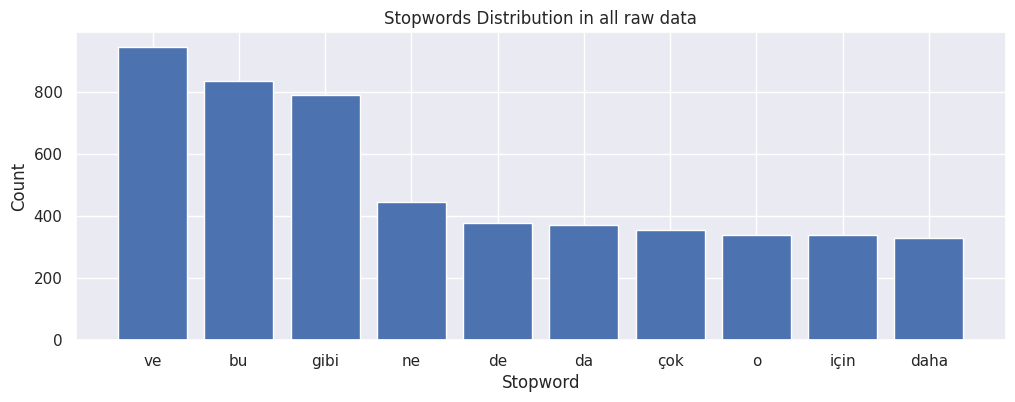

In [ ]:
corpus=create_corpus(raw_data)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
plt.rcParams['figure.figsize'] = (12.0, 4.0)
plt.title("Stopwords Distribution in all raw data")
plt.xlabel("Stopword")
plt.ylabel("Count")
x,y=zip(*top)
plt.bar(x,y)

# Etiket Bazında Stopwords Dağılımının İncelenmesi

In [ ]:
sexist_corpus = create_corpus_df(raw_data, 'SEXIST')
insult_corpus = create_corpus_df(raw_data, 'INSULT')
racist_corpus = create_corpus_df(raw_data, 'RACIST')
profanity_corpus = create_corpus_df(raw_data, 'PROFANITY')
other_corpus = create_corpus_df(raw_data, 'OTHER')

<BarContainer object of 10 artists>

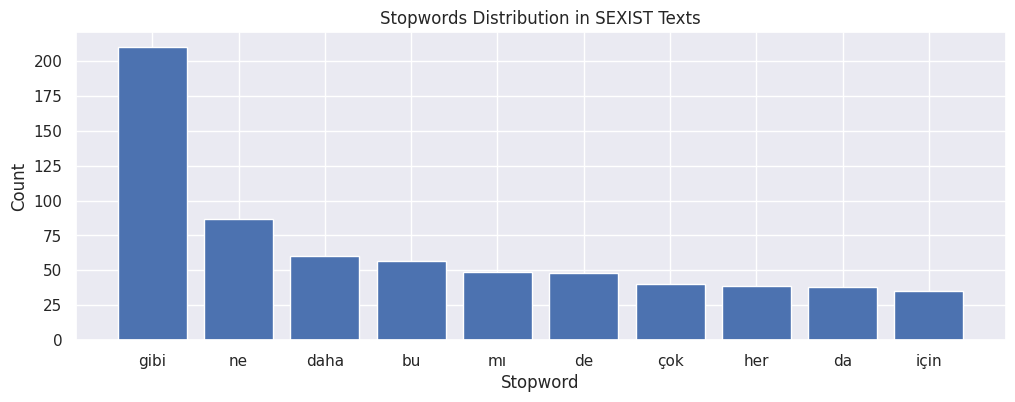

In [ ]:
dic=defaultdict(int)
for word in sexist_corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
plt.rcParams['figure.figsize'] = (12.0, 4.0)
plt.title("Stopwords Distribution in SEXIST Texts")
plt.xlabel("Stopword")
plt.ylabel("Count")
x,y=zip(*top)
plt.bar(x,y)

<BarContainer object of 10 artists>

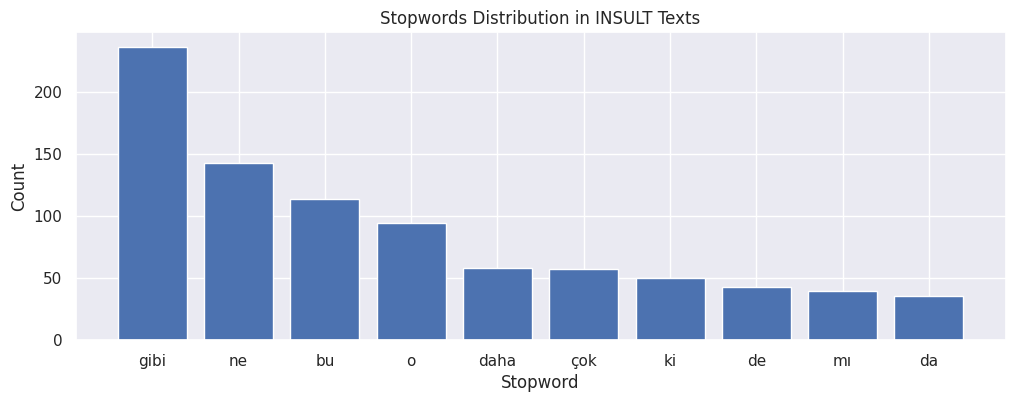

In [ ]:
dic=defaultdict(int)
for word in insult_corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
plt.rcParams['figure.figsize'] = (12.0, 4.0)
plt.title("Stopwords Distribution in INSULT Texts")
plt.xlabel("Stopword")
plt.ylabel("Count")
x,y=zip(*top)
plt.bar(x,y)

<BarContainer object of 10 artists>

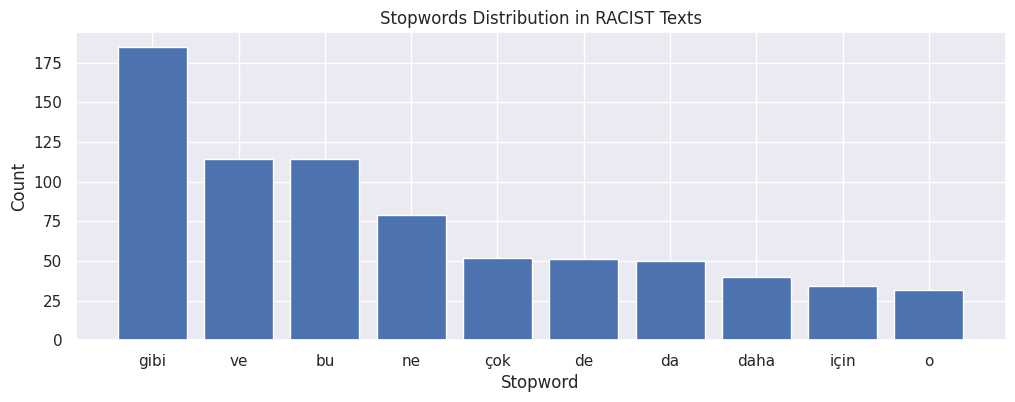

In [ ]:
dic=defaultdict(int)
for word in racist_corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
plt.rcParams['figure.figsize'] = (12.0, 4.0)
plt.title("Stopwords Distribution in RACIST Texts")
plt.xlabel("Stopword")
plt.ylabel("Count")
x,y=zip(*top)
plt.bar(x,y)

<BarContainer object of 10 artists>

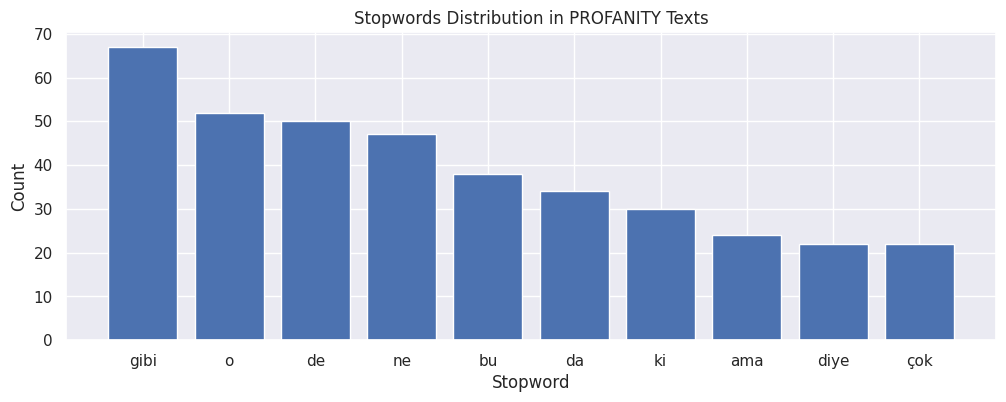

In [ ]:
dic=defaultdict(int)
for word in profanity_corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
plt.rcParams['figure.figsize'] = (12.0, 4.0)
plt.title("Stopwords Distribution in PROFANITY Texts")
plt.xlabel("Stopword")
plt.ylabel("Count")
x,y=zip(*top)
plt.bar(x,y)

<BarContainer object of 10 artists>

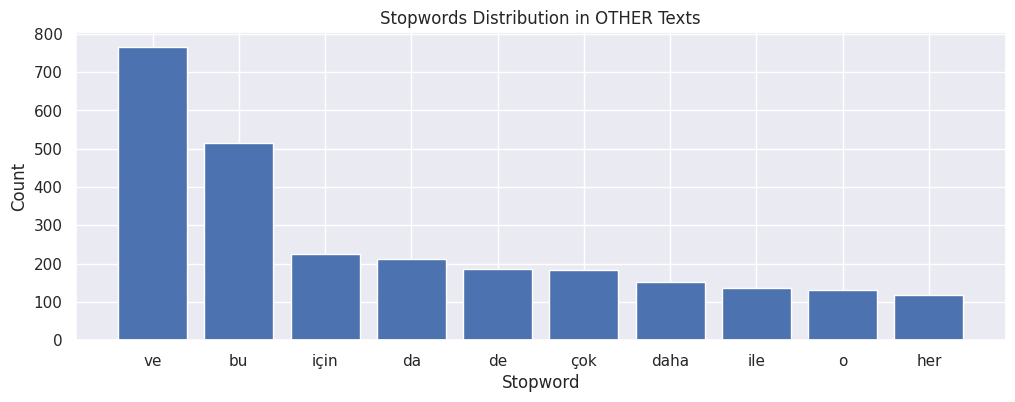

In [ ]:
dic=defaultdict(int)
for word in other_corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
plt.rcParams['figure.figsize'] = (12.0, 4.0)
plt.title("Stopwords Distribution in OTHER Texts")
plt.xlabel("Stopword")
plt.ylabel("Count")
x,y=zip(*top)
plt.bar(x,y)

# Noktala İşaretlerinin Veri Seti İçerisindeki Miktarının İncelenmesi
Grafik incelemelerine göre veri seti içerisindeki text'lerin içerisinde çok fazla noktalama işareti olmadığı gözlemlendi. Var olan notkalama işaretleri önişleme aşamasında veri setinden çıkartıldı.

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

Text(0, 0.5, 'Count')

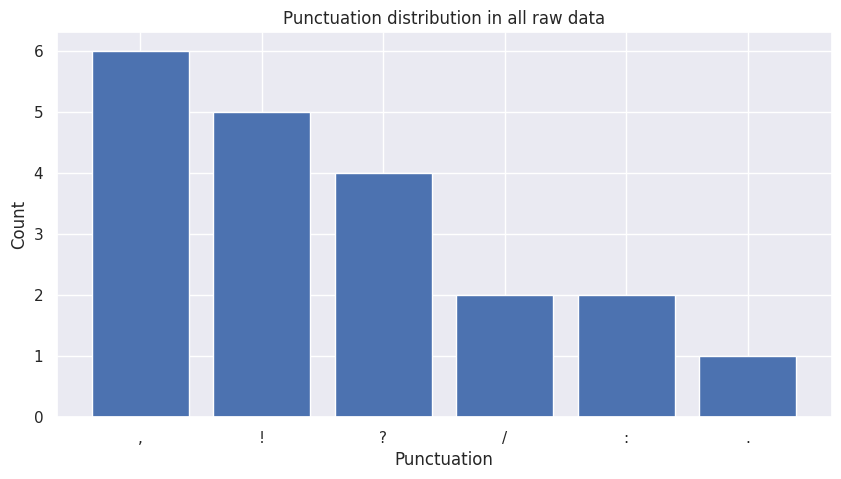

In [ ]:
plt.figure(figsize=(10,5))
corpus=create_corpus(raw_data)

dic=defaultdict(int)
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]        
x,y=zip(*top)
plt.bar(x,y)
plt.title("Punctuation distribution in all raw data")
plt.xlabel("Punctuation")
plt.ylabel("Count")

* Bazı text'lerin tek harften oluştuğu gözlemlendi. 
* Tek harften oluşan veriler ön işleme aşamasında veri setinden çıkartıldı.
* Tek harften oluşan veri sayısı: 133

In [ ]:
listOfChars = list()
listOfChars.extend(string.ascii_letters)

In [ ]:
raw_data[raw_data['text'].isin(listOfChars)]

,id,text,is_offensive,target
12340,e2d954b7-266d-43be-845e-015a8ecf1241,j,0,RACIST
12341,697c1629-d4f6-4e85-87f6-3fa5510f55cf,k,1,RACIST
12342,f760cf45-ad05-46e7-9971-2b515decae97,e,1,RACIST
12343,03307826-defb-4e34-aa5a-b74ca74c84c2,e,0,RACIST
12344,42bf5d9d-48ab-489f-a673-d6d792f97eb9,b,0,SEXIST
...,...,...,...,...
12485,65ca945d-15af-4d59-8d7d-b731578e45d8,e,1,PROFANITY
12486,593b9691-8287-4400-bb22-ca2add665b9a,j,0,OTHER
12487,6d93aea2-8130-4168-81ea-bd8557ce3272,b,1,OTHER
12488,b89720e0-fdf3-44c8-ae20-14e8fe2d94af,h,0,OTHER


In [ ]:
len(raw_data[raw_data['text'].isin(listOfChars)])

133

# İşlenmemiş Veri Seti İçerisinde En Sık Kullanılan Verilerin İncelenmesi

In [ ]:
counter=Counter(create_corpus(raw_data))
most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)

<Axes: >

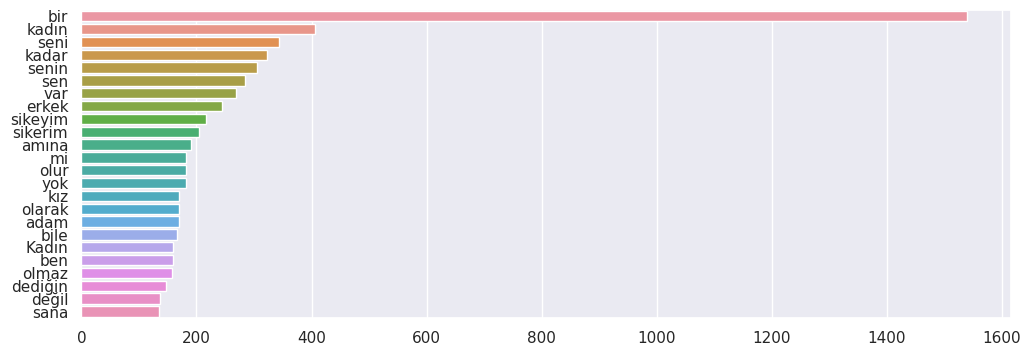

In [ ]:
sns.barplot(x=y,y=x)

# ngram Analizi (n=2)

In [ ]:
def get_top_text_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

<Axes: >

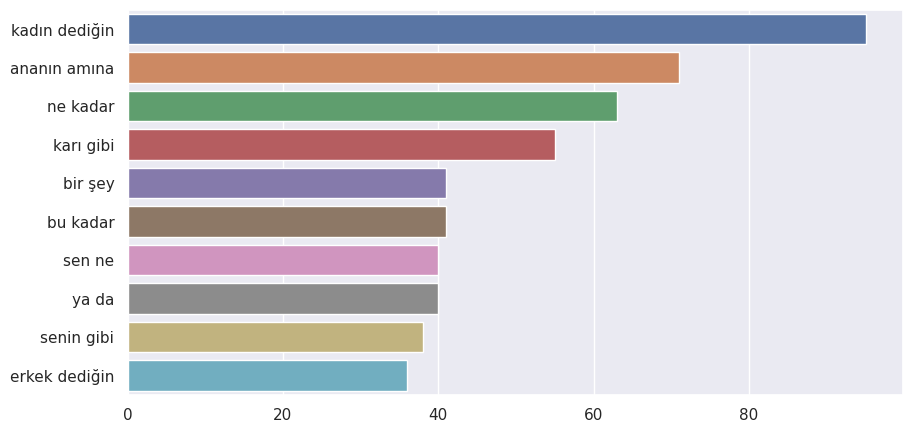

In [ ]:
plt.figure(figsize=(10,5))
top_tweet_bigrams=get_top_text_bigrams(raw_data['text'])[:10]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)